<a href="https://colab.research.google.com/github/so-nafy/Projet_Deep-Learning_DOG/blob/main/SOW_Nafy_Deep_Learning_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT + LOAD DATA

In [ ]:
!pip install -U ipykernel

In [ ]:
!pip install pyngrok

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
import PIL
from tensorflow import keras
from PIL import Image
import tensorflow as tf

import shutil
import random
import glob
from time import time
import shutil
import glob

import os
import numpy as np
import pandas as pd
import cv2
from PIL import ImageFile
import matplotlib.pyplot as plt                        
%matplotlib inline

## Import pr la construction du NN avec API functional 
import tensorflow 
print(tensorflow.__version__)
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras import layers

## Import pr le tuning 
# Petit Passage secret entre tf et sklearn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

2.4.1


Exploration de la data

In [ ]:
dataset_url_train = 'http://vision.stanford.edu/aditya86/ImageNetDogs/train_data.mat'
dataset_url_test = 'http://vision.stanford.edu/aditya86/ImageNetDogs/test_data.mat'
dataset_url_image_tar = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
dataset_url_annotation_tar ='http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar'
dataset_url_list_tar = 'http://vision.stanford.edu/aditya86/ImageNetDogs/lists.tar'

In [ ]:
image_zip = tf.keras.utils.get_file('images.tar',
                                         cache_subdir=os.path.abspath('.'),
                                         origin = dataset_url_image_tar,
                                         extract = True)
os.remove(image_zip)

793583616/793579520 [==============================] - 37s 0us/step


In [ ]:
traindata_mat = tf.keras.utils.get_file('traindata.mat',
                                        cache_subdir=os.path.abspath('.'),
                                         origin = dataset_url_train,
                                         extract = False)

In [ ]:
from scipy.io import loadmat
test = loadmat('/content/drive/MyDrive/test_data.mat')
train = loadmat('/content/drive/MyDrive/train_data.mat')

In [ ]:
images =  !tar -xvf /content/drive/MyDrive/images.tar

In [ ]:
images

['Images/',
 'Images/n02085620-Chihuahua/',
 'Images/n02085620-Chihuahua/n02085620_10621.jpg',
 'Images/n02085620-Chihuahua/n02085620_10976.jpg',
 'Images/n02085620-Chihuahua/n02085620_11238.jpg',
 'Images/n02085620-Chihuahua/n02085620_11258.jpg',
 'Images/n02085620-Chihuahua/n02085620_11337.jpg',
 'Images/n02085620-Chihuahua/n02085620_1152.jpg',
 'Images/n02085620-Chihuahua/n02085620_11696.jpg',
 'Images/n02085620-Chihuahua/n02085620_11818.jpg',
 'Images/n02085620-Chihuahua/n02085620_11948.jpg',
 'Images/n02085620-Chihuahua/n02085620_1205.jpg',
 'Images/n02085620-Chihuahua/n02085620_12334.jpg',
 'Images/n02085620-Chihuahua/n02085620_1235.jpg',
 'Images/n02085620-Chihuahua/n02085620_1298.jpg',
 'Images/n02085620-Chihuahua/n02085620_13151.jpg',
 'Images/n02085620-Chihuahua/n02085620_1321.jpg',
 'Images/n02085620-Chihuahua/n02085620_13383.jpg',
 'Images/n02085620-Chihuahua/n02085620_1346.jpg',
 'Images/n02085620-Chihuahua/n02085620_14413.jpg',
 'Images/n02085620-Chihuahua/n02085620_14516

Annotation

In [ ]:
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'test_info', 'test_fg_data', 'test_data'])

In [ ]:
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_info', 'train_fg_data', 'train_data'])

In [ ]:
type (test['test_fg_data']), test['test_data'].shape

(numpy.ndarray, (8580, 12000))

In [ ]:
type (train['train_fg_data']), train['train_data'].shape

(numpy.ndarray, (12000, 12000))

In [ ]:
print(train)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar 28 12:03:37 2012', '__version__': '1.0', '__globals__': [], 'train_info': array([[(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
       [array(['n02116738-Afri

In [ ]:
path = os.getcwd()
path

'/content'

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
os.makedirs('/content/drive/MyDrive/Data') 

In [ ]:
import os
import random
import glob

# répertoire de travail
os.chdir('/content/drive/MyDrive/Data')
os.makedirs('Train')
os.makedirs('Valid')
os.makedirs('Test')

In [ ]:
os.listdir('/content/drive/MyDrive/Data'+os.path.join("/Train"))

['n02113624-toy_poodle',
 'n02112706-Brabancon_griffon',
 'n02113712-miniature_poodle',
 'n02113978-Mexican_hairless',
 'n02113186-Cardigan',
 'n02113799-standard_poodle',
 'n02115641-dingo',
 'n02116738-African_hunting_dog',
 'n02113023-Pembroke',
 'n02115913-dhole',
 'n02111500-Great_Pyrenees',
 'n02112137-chow',
 'n02111277-Newfoundland',
 'n02112018-Pomeranian',
 'n02110627-affenpinscher',
 'n02112350-keeshond',
 'n02111129-Leonberg',
 'n02111889-Samoyed',
 'n02110958-pug',
 'n02110806-basenji',
 'n02110063-malamute',
 'n02109961-Eskimo_dog',
 'n02108422-bull_mastiff',
 'n02109525-Saint_Bernard',
 'n02108551-Tibetan_mastiff',
 'n02108000-EntleBucher',
 'n02108915-French_bulldog',
 'n02109047-Great_Dane',
 'n02108089-boxer',
 'n02110185-Siberian_husky',
 'n02107142-Doberman',
 'n02107683-Bernese_mountain_dog',
 'n02107312-miniature_pinscher',
 'n02106030-collie',
 'n02107908-Appenzeller',
 'n02106662-German_shepherd',
 'n02106382-Bouvier_des_Flandres',
 'n02106550-Rottweiler',
 'n02

In [ ]:
import pathlib
data=pathlib.Path('/content/drive/MyDrive/Data') 
print(data)

#path = os.getcwd()
#path

/content/drive/MyDrive/Data


In [ ]:
import os
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf

Test Images

In [ ]:
imread('/content/drive/MyDrive/Data/Train/n02085620-Chihuahua/n02085620_4602.jpg')

array([[[237, 241, 250],
        [237, 241, 250],
        [237, 241, 250],
        ...,
        [229, 236, 244],
        [229, 236, 244],
        [229, 236, 244]],

       [[237, 241, 250],
        [237, 241, 250],
        [237, 241, 250],
        ...,
        [229, 236, 244],
        [229, 236, 244],
        [229, 236, 244]],

       [[237, 241, 250],
        [237, 241, 250],
        [236, 240, 249],
        ...,
        [229, 236, 244],
        [229, 236, 244],
        [229, 236, 244]],

       ...,

       [[186, 158, 119],
        [184, 156, 117],
        [186, 158, 119],
        ...,
        [176, 187, 129],
        [183, 196, 142],
        [176, 189, 135]],

       [[188, 160, 121],
        [187, 159, 120],
        [189, 161, 122],
        ...,
        [152, 161, 104],
        [170, 181, 125],
        [180, 193, 139]],

       [[194, 166, 127],
        [192, 164, 125],
        [195, 167, 128],
        ...,
        [123, 132,  75],
        [144, 155,  99],
        [171, 184, 130]]

In [ ]:
a ='/content/drive/MyDrive/Data/Train/n02113023-Pembroke/n02113023_10636.jpg'

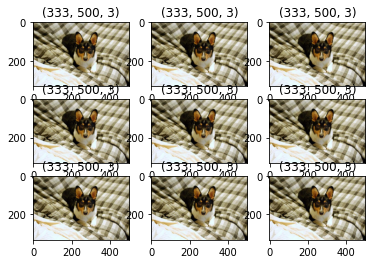

In [ ]:
# Une boucle pr afficher plusieurs images dans une figure

for i in range(9):
    plt.subplot(3, 3, i+1)
    filename = a
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)

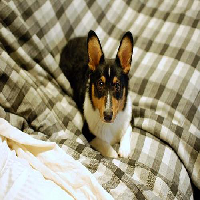

In [ ]:
tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Data/Train/n02113023-Pembroke/n02113023_10636.jpg', target_size=(200, 200))

Preparation


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_directory(
    'Train', # path du train 
    target_size=(150, 150), 
    subset="training",
    batch_size=20, 
    class_mode= 'binary'
)

Found 5044 images belonging to 120 classes.


In [ ]:
val_gen = val_datagen.flow_from_directory(
    'Valid', # path du train 
    target_size=(150, 150), 
    subset="training",
    batch_size=20, 
    class_mode= 'binary'
)

Found 9014 images belonging to 50 classes.


In [ ]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory='Train', target_size=(224,224), class_mode='binary', batch_size=10)

Found 5044 images belonging to 120 classes.


In [ ]:
img_height, img_width=180,180
batch_size=20
train_gen = tf.keras.preprocessing.image_dataset_from_directory(
    'Train', # path du train 
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width), 
    batch_size=batch_size, 
    #target_size=(150, 150), 

    #batch_size=20, 
    #class_mode= 'binary'
)

Found 5044 files belonging to 120 classes.
Using 4036 files for training.


In [ ]:
batch_size=20
val_gen = tf.keras.preprocessing.image_dataset_from_directory(
    'Valid', # path du train 
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width), 
    batch_size=batch_size, 
    #target_size=(150, 150), 

    #batch_size=20, 
    #class_mode= 'binary'
)

Found 9014 files belonging to 50 classes.
Using 1802 files for validation.


In [ ]:
#Test training
batch_size = 3
img_height = 200
img_width = 200
train_data = tf.keras.preprocessing.image_dataset_from_directory(
"Train",
validation_split=0.2,
subset="training",
seed=42,
image_size=(img_height, img_width),
batch_size=batch_size,
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
"Valid",
validation_split=0.2,
subset="validation",
seed=42,
image_size=(img_height, img_width),
batch_size=batch_size)

class_names = val_data.class_names
print(class_names)


Found 5044 files belonging to 120 classes.
Using 4036 files for training.
Found 9014 files belonging to 50 classes.
Using 1802 files for validation.
['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_

In [ ]:
class_names = train_gen.class_names
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

Affichage Photos

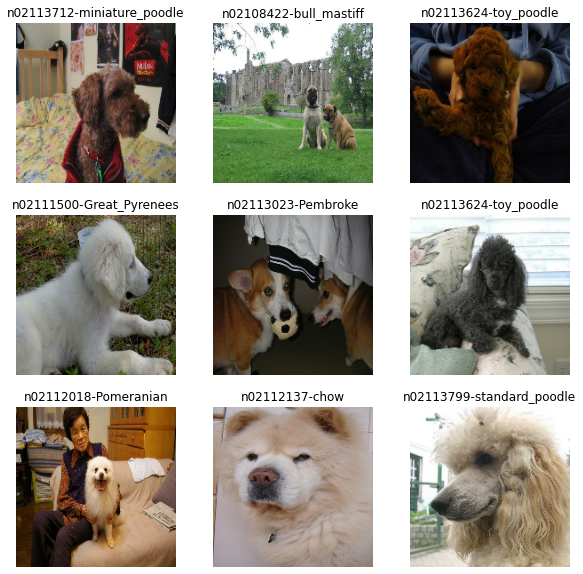

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10))
for images, labels in train_gen.take(1):
  for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
   # plt.tight_layout()
    #plt.show()

In [ ]:
num_classes = 5

model = Sequential([
 layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
 layers.Conv2D(16,3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32,3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64,3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes,activation='softmax')

])                                          

In [ ]:
# Ds le cadre du df data2 : x1, x2 comme features
inputs = tf.keras.layers.Input(shape=(2, ))

In [ ]:
# Maintenant, ns travaillons sur des images, ns indiquons 
# les dim de l'image => (heigth, width, mode)
# del model 
#Transformation des images : precisez:les dimensions de l'images(hauteur, largeur)

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0   

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [ ]:
history = model.fit(train_gen, epochs=10, steps_per_epoch=100, 
          validation_data=val_gen, validation_steps=50)

Epoch 1/10
100/100 [==============================] - 1138s 11s/step - loss: -1958371230.5284 - acc: 0.0000e+00 - val_loss: -9100146688.0000 - val_acc: 0.0160
Epoch 2/10
100/100 [==============================] - 788s 8s/step - loss: -110775548289.2673 - acc: 0.0000e+00 - val_loss: -128500219904.0000 - val_acc: 0.0200
Epoch 3/10
100/100 [==============================] - 626s 6s/step - loss: -970970628420.4357 - acc: 0.0000e+00 - val_loss: -681363832832.0000 - val_acc: 0.0210
Epoch 4/10
100/100 [==============================] - 449s 5s/step - loss: -4241595294101.5444 - acc: 0.0000e+00 - val_loss: -2131725778944.0000 - val_acc: 0.0220
Epoch 5/10
100/100 [==============================] - 341s 3s/step - loss: -12938086109143.4453 - acc: 0.0000e+00 - val_loss: -5937072439296.0000 - val_acc: 0.0180
Epoch 6/10
100/100 [==============================] - 282s 3s/step - loss: -31624115480555.7227 - acc: 0.0000e+00 - val_loss: -12475226390528.0000 - val_acc: 0.0130
Epoch 7/10
100/100 [=======

Construction du CNN

In [ ]:
tf.keras.models.save_model(model,'my_model1.hdf5')

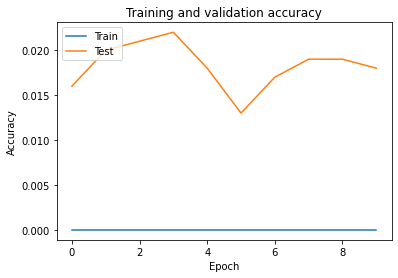

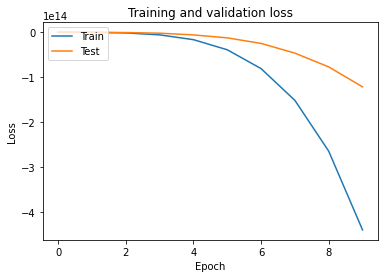

In [ ]:
# Plot training & validation accuracy values
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure()

# Plot training & validation loss values
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
print(max(val_acc))

0.02199999988079071


In [ ]:
type(val_gen)

In [ ]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory='Train', target_size=(224,224), class_mode='binary', batch_size=10)

#Lutter contre le surapprentissage




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen

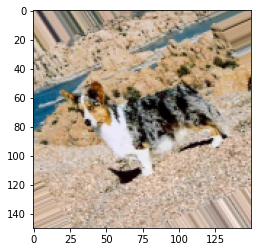

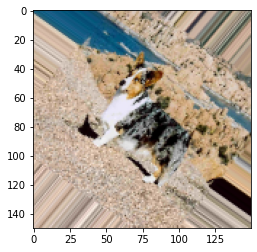

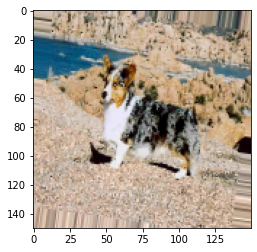

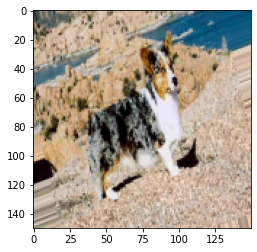

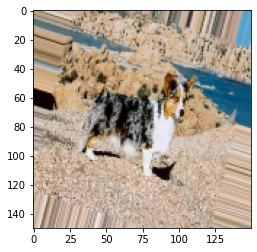

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img('/content/drive/MyDrive/Data/Train/n02113186-Cardigan/n02113186_1016.jpg', target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(150, 150, 3)))


Reseau avec les couche d'entrée et couche superieur

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2))


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
____________________________________________________

In [ ]:
cnn.add(tf.keras.layers.Dense(512, activation='relu'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4

In [ ]:
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
(1200 * 512) + 512

614912

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4

In [ ]:
cnn.get_weights()

[array([[[[ 5.71760088e-02,  9.66477692e-02,  4.26465273e-02,
            1.55839354e-01,  1.01397306e-01,  1.80671722e-01,
            7.46314526e-02, -1.14641182e-01, -9.77983773e-02,
           -1.60451069e-01,  1.33269578e-01,  1.37459159e-01,
           -7.75182769e-02, -9.87935066e-03,  4.29320037e-02,
            6.16863817e-02],
          [ 1.64159626e-01, -2.93643773e-02,  1.55006051e-02,
           -9.70333070e-02,  1.73512757e-01, -6.63220808e-02,
            1.07635915e-01,  4.54760045e-02, -1.56343341e-01,
            9.04798508e-05,  1.13975793e-01,  3.89710218e-02,
            2.38282830e-02, -5.90860248e-02,  1.83068961e-02,
           -1.59107789e-01],
          [ 1.19294673e-02,  1.05262458e-01, -9.32346731e-02,
            1.62822068e-01, -1.75960466e-01, -1.34334803e-01,
           -1.53754592e-01, -1.75026715e-01,  6.59052730e-02,
           -9.03763920e-02,  9.27538276e-02, -9.30223539e-02,
           -6.77069873e-02,  1.37784749e-01, -2.37094015e-02,
            

#Deploying Image Classifier as Web Application

In [ ]:
!pip install streamlit

In [ ]:
pip install pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.save_model(model,'my_model1.hdf5')
  return model 
  model=load_model()
  st.write("""
            #DOG BREED CLASSIFICATION
            """
            )
  
file = st.file_uploader("Veuillez charger une image de chien", type=["jpg", "png"])
import cv2
from PIL import Image , ImageOps
import numpy as np 
def import_and_predict(image_data,model):

       size = (180,180)
       image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
       img = np.asarray(image)
       img_reshape = img[np.newaxis,...]
       prediction = model.predict(img_reshape)

       return prediction
if file is None:
  st.text("Charger l'image")
else:
  image = Image.open(file)
  st.image(image, use_colum_width=True)
  predictions = import_and_predict(image,model)
  class_names=['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_terrier', 'n02095314-wire-haired_fox_terrier', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02096294-Australian_terrier', 'n02096437-Dandie_Dinmont', 'n02096585-Boston_bull', 'n02097047-miniature_schnauzer', 'n02097130-giant_schnauzer', 'n02097209-standard_schnauzer', 'n02097298-Scotch_terrier', 'n02097474-Tibetan_terrier']
  string="L'image most likely is : "+class_names[np.argmax(predictions)]
  st.success(string)

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
!ngrok authtoken 1qUydw22lBoYD80s34PWFqYkEZs_26bCMCfx41k4GNbpTfmc9


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
#url= ngrok.connect(port=8501)
#url
#Open HTTP tunnel on the port 80
public_url= ngrok.connect(port=80)
#Open a SSH tunnel
ssh_url = ngrok.connect(22, "tcp")

In [ ]:
public_url

<NgrokTunnel: "http://a5de84b80d0e.ngrok.io" -> "http://localhost:80">

In [ ]:
ngrok.kill()

In [ ]:
!cat /content/drive/MyDrive/Data/nohup.out

2021-03-31 00:43:49.415174: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8505
  External URL: http://34.86.116.131:8505

2021-03-31 00:44:13.073262: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8506
  External URL: http://34.86.116.131:8506

2021-03-31 00:44:18.465934: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8507
  External URL: http://34.86.116.131:8507

2021-03-31 00:52:47.069408: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

 

test


#Test Tranfer Learning

In [ ]:
#Telechargement ensv data Stanfort a partir biblio de Tensorflow

import tensorflow_datasets as tfds

dataset, info = tfds.load(name="stanford_dogs", with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete0396KE/stanford_dogs-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete0396KE/stanford_dogs-test.tfrecord


Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


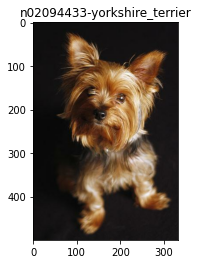

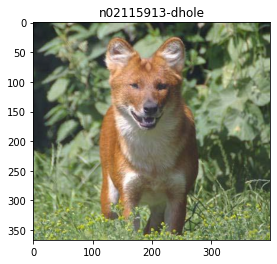

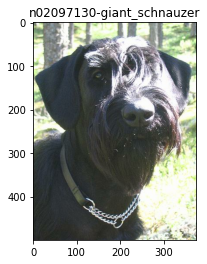

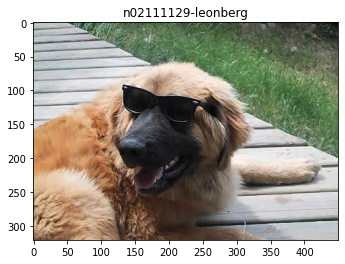

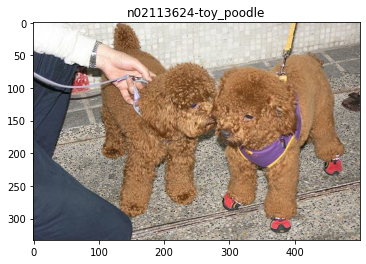

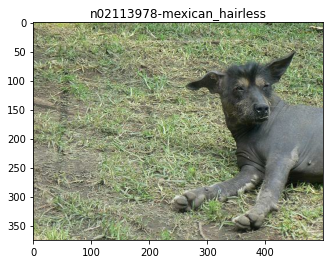

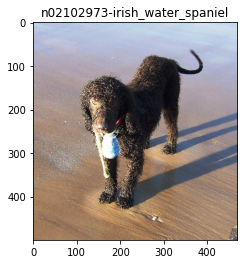

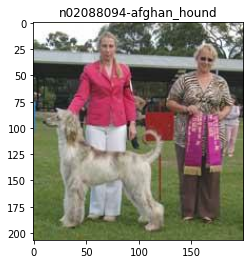

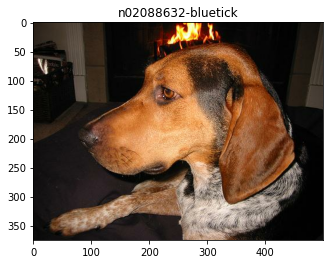

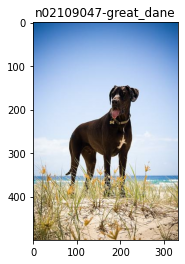

In [ ]:
# fonction pour convertir les index d'étiquettes en race
get_name = info.features['label'].int2str

for doggo in dataset['train'].take(10):
    plt.figure()
    plt.imshow(doggo['image'])
    plt.title(get_name(doggo['label']))

In [ ]:
IMG_LEN = 224
IMG_SHAPE = (IMG_LEN,IMG_LEN,3)
N_BREEDS = 120

training_data = dataset['train']
test_data = dataset['test']

def preprocess(ds_row):
  
    # Image conversion int->float + resizing
    image = tf.image.convert_image_dtype(ds_row['image'], dtype=tf.float32)
    image = tf.image.resize(image, (IMG_LEN, IMG_LEN), method='nearest')
  
    # Onehot encoding labels
    label = tf.one_hot(ds_row['label'],N_BREEDS)

    return image, label

def prepare(dataset, batch_size=None):
    ds = dataset.map(preprocess, num_parallel_calls=4)
    ds = ds.shuffle(buffer_size=1000)
    if batch_size:
      ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds

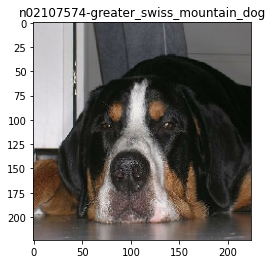

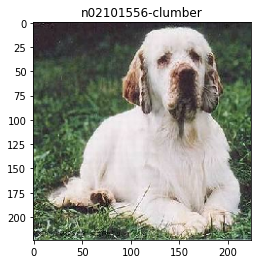

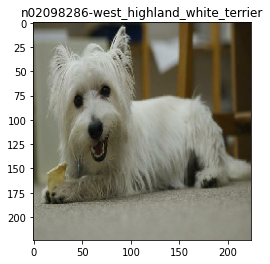

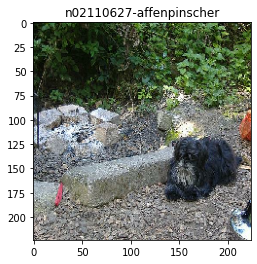

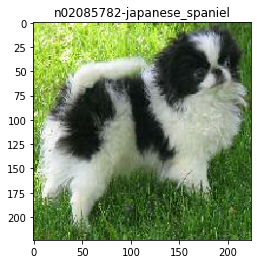

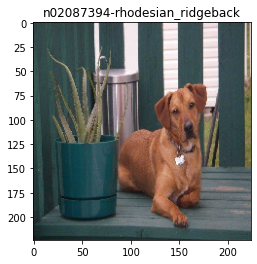

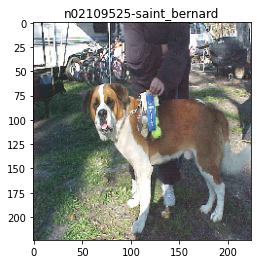

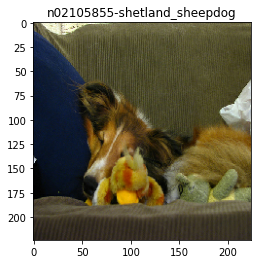

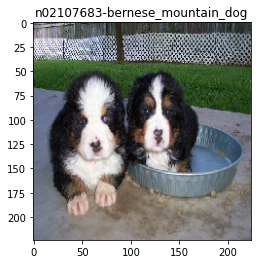

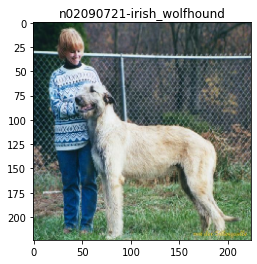

In [ ]:
decode = lambda x: get_name(tf.math.argmax(x))

for pic, label in prepare(training_data).take(10):
  plt.figure()
  plt.imshow(pic)
  plt.title(decode(label))

In [ ]:
Model building + Training

In [ ]:
##j'expérimente récemment avec TensorFlow Lite et que je prévois de le déployer sur mon smartphone à des fins de test, 
#j'ai décidé de commencer avec un réseau MobileNetV2 pré- entraîné , car il est très performant sur les appareils mobiles.
#Ce réseau servira de base

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(N_BREEDS, activation='softmax')
])

In [ ]:
# hyperparameter optimization
model.compile(optimizer=tf.keras.optimizers.Adamax(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'top_k_categorical_accuracy'])
			  
train_batches = prepare(training_data, batch_size=32)
test_batches = prepare(test_data, batch_size=32)

history = model.fit(train_batches,
                    epochs=5,
                    validation_data=test_batches)

Epoch 1/5
375/375 [==============================] - 836s 2s/step - loss: 4.8505 - accuracy: 0.0217 - top_k_categorical_accuracy: 0.0865 - val_loss: 4.3051 - val_accuracy: 0.0761 - val_top_k_categorical_accuracy: 0.2266
Epoch 2/5
375/375 [==============================] - 810s 2s/step - loss: 4.1568 - accuracy: 0.1002 - top_k_categorical_accuracy: 0.2966 - val_loss: 3.8618 - val_accuracy: 0.1647 - val_top_k_categorical_accuracy: 0.4362
Epoch 3/5
375/375 [==============================] - 816s 2s/step - loss: 3.7208 - accuracy: 0.1996 - top_k_categorical_accuracy: 0.4925 - val_loss: 3.4790 - val_accuracy: 0.2657 - val_top_k_categorical_accuracy: 0.6122
Epoch 4/5
375/375 [==============================] - 808s 2s/step - loss: 3.3353 - accuracy: 0.3049 - top_k_categorical_accuracy: 0.6594 - val_loss: 3.1451 - val_accuracy: 0.3571 - val_top_k_categorical_accuracy: 0.7301
Epoch 5/5
375/375 [==============================] - 803s 2s/step - loss: 2.9997 - accuracy: 0.3958 - top_k_categorical_

In [ ]:
#model.summary()

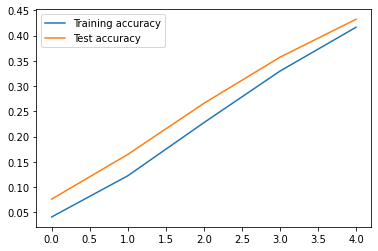

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [ ]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [ ]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_breed(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))